# ADP 25회 실기 문제 
- 23.10.09 3시간 3분 소요

In [128]:
import numpy as np
from scipy.stats import t
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score, completeness_score
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [134]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


```{admonition} 1번
**데이터 확인 및 전처리**     
- 1.1 EDA, 이상치 제거 후 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시
- 1.2 F, M feature 기반으로 군집분석 실시
- 1.3 군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해서 서술
- 1.4 적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시
- 데이터 설명
    - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
    - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
    - Description: Product (item) name. Nominal.    
    - Quantity: The quantities of each product (item) per transaction. Numeric.     
    - InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
    - UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
    - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
    - Country: Country name. Nominal, the name of the country where each customer resides.   
- 출처
    - https://archive.ics.uci.edu/ml/index.phpm
```

In [36]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


## 1.1 EDA, 이상치 제거 후 F(소비자별 구매빈도), M(소비자별 총 구매액) 기반의 파생변수들을 새로 생성해서 그 결과값으로 탐색적 분석 실시

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE,17.69
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France,7.95
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany,36.65


<class 'pandas.core.frame.DataFrame'>
Index: 41020 entries, 0 to 41023
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    41020 non-null  object 
 1   StockCode    41020 non-null  object 
 2   Description  41020 non-null  object 
 3   Quantity     41020 non-null  int64  
 4   InvoiceDate  41020 non-null  object 
 5   UnitPrice    41020 non-null  float64
 6   CustomerID   41020 non-null  float64
 7   Country      41020 non-null  object 
 8   Price        41020 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.1+ MB


None

,Quantity,UnitPrice,CustomerID,Price
count,41020.000000,41020.000000,41020.000000,41020.000000
mean,19.368893,4.348582,13173.086787,23.717475
std,42.665964,28.218981,1006.400886,50.151751
min,-480.000000,0.000000,12348.000000,-479.780000
25%,4.000000,1.250000,12484.000000,8.950000
50%,10.000000,1.950000,12647.000000,12.850000
75%,16.000000,3.750000,14156.000000,21.000000
max,1728.000000,1715.850000,17097.000000,1728.720000


Series([], dtype: int64)

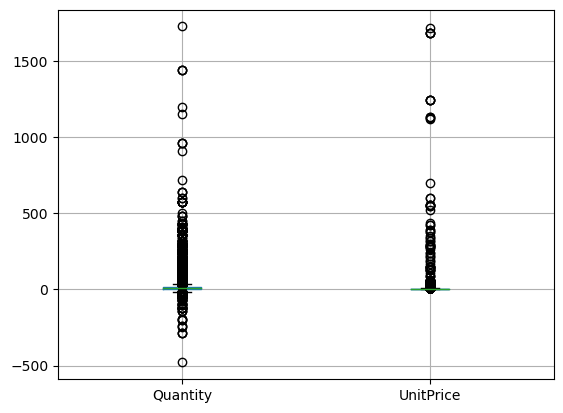

,CustomerID,Price_count,Price_mean,Price_sum
count,348.000000,348.000000,348.000000,348.000000
mean,12737.186782,117.873563,22.060519,2795.663276
std,589.498367,354.227277,61.876095,13299.385461
min,12348.000000,1.000000,0.466667,1.400000
25%,12476.750000,23.000000,12.546583,339.265000
50%,12590.500000,51.500000,14.281402,760.280000
75%,12705.500000,113.250000,17.688867,2033.037500
max,17097.000000,5903.000000,1125.000000,199717.130000


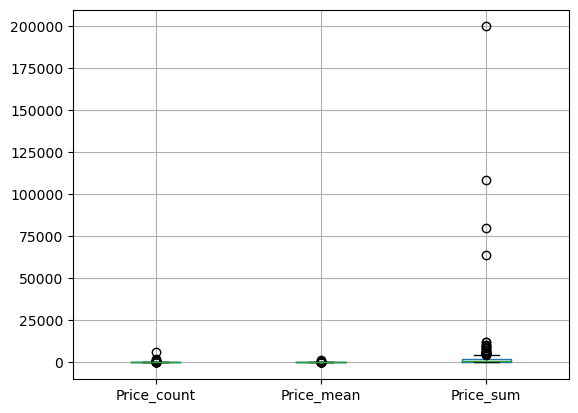

In [78]:
# EDA
display(df.head(3))
display(df.info())
display(df.describe())
display(df.isna().sum()[df.isna().sum()>0])

df[['Quantity', 'UnitPrice']].boxplot()
plt.show()

# 이상치 처리
del_idx = []
del_idx.extend(list(df[df.Quantity > 2000].index))
del_idx.extend(list(df[df.UnitPrice > 3000].index))
df = df.drop(del_idx, axis = 0)

# 파생변수 생성
df['Price'] = df['Quantity'] + df['UnitPrice']

# df['CustomerID'].value_counts()
customer_df = df[['CustomerID', 'Price']].groupby('CustomerID').agg({'Price':['count', 'mean', 'sum']})
customer_df.columns = ['_'.join(x) for x in customer_df.columns.to_flat_index()]
customer_df = customer_df.reset_index()

display(customer_df.describe())
customer_df[['Price_count', 'Price_mean', 'Price_sum']].boxplot()
plt.show()

customer_df = customer_df.drop(list(customer_df[customer_df.Price_sum > 50000].index), axis = 0)

#### [답안] (42분 소요)
- 범주형 변수 5개, 연속형 변수 2개, 날짜형 변수 1개로 이루어진 41,024건의 데이터로 결측은 존재하지 않는다. 연속형 변수의 기초통계량을 살펴보았을때 Quantity가 음수가 있는데 반품건으로 보여진다. 연속형 변수 quantity, unitprice를 boxplot을 확인했을때 분포에서 멀리 떨어진 값들이 보여 이를 이상치로 간주하고 평균으로 대체한다.
- 그리고 데이터에서  quantity와 unitprice를 곱하여 price 변수를 생성하였고 고객별로 거래 건수, 평균 구매금액, 합계 구매금액 변수를 생성하였다. 그 후 분포를 보았을때 합계구매금액에서 멀리 떨어진 이상치가 보여 price_sum이 50,000보다 큰 3건은 이상치로 간주하여 삭제처리하였다.


## 파생변수들만을 가지고 군집분석 실시

클러스터 구성:  Counter({0: 298, 1: 46})
클러스터 중심: 
          Price_count  Price_mean  Price_sum
cluster0    -0.325429    0.007582  -0.307279
cluster1     2.108211   -0.049116   1.990634



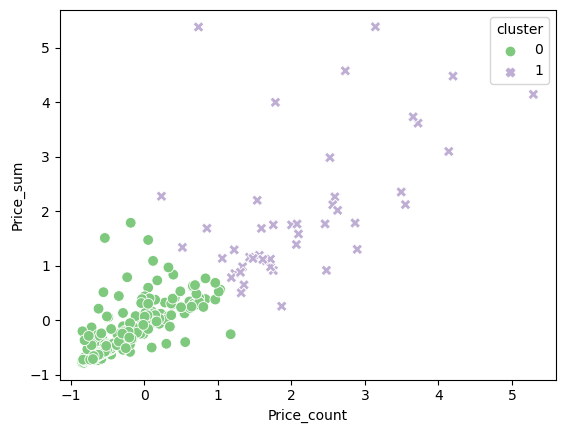

In [97]:
# 데이터 준비
df2 = customer_df.drop(['CustomerID'], axis = 1).copy()
ss = StandardScaler()
df2 = pd.DataFrame(ss.fit_transform(df2), columns = df2.columns)

# 군집 만들기
model = KMeans(n_clusters = 2)
distances = model.fit_transform(df2)
kmeans_result = pd.DataFrame(model.labels_, columns = ['cluster']) # 각 데이터 군집 반환
# 군집 정보 확인
print('클러스터 구성: ',  Counter(model.labels_))
centers = pd.DataFrame(model.cluster_centers_, columns = df2.columns, index = ['cluster%s' %i for i in range(2)])
print('클러스터 중심: \n{}\n'.format(centers))

ddf = pd.merge(df2, kmeans_result, left_index = True, right_index = True)

# 군집 결과 시각화
fig, ax = plt.subplots(1,1)
sns.scatterplot(x = 'Price_count', y = 'Price_sum', data = ddf, hue = 'cluster', style = 'cluster',
               s = 60, ax = ax, palette = 'Accent')
plt.show()


#### [답안] (26분)
- 파생변수 Price_count  Price_mean  Price_sum만 가지고 군집분석을 실시하였다. 군집의 개수는 2로 설정했으며 kmeans 알고리즘을 사용하였다. 그 결과 시각화를 통해 확인했을때 구매건수가 많고 구매금액도 많은 군집과 구매건수가 적고 구매금액도 작은 군집으로 나누어짐을 확인할 수 있었다.

## 군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해서 서술

In [98]:
# 타당성 평가
print('분리도(실루엣 계수): %.3f'%silhouette_score(df2, kmeans_result.values.ravel()))
print('응집도(Inertia): %.3f'%model.inertia_)

분리도(실루엣 계수): 0.697
응집도(Inertia): 585.445


#### [답안] (10분)
- 군집 간 분리도는 실루엣 계수를 사용해 나타내는데 같은 군집 내의 데이터와는 얼마나 가깝게 군집화 되었고, 다른 군집에 있는 데이터와는 얼마나 멀리 분포되어 있는지 나타내는 지표이다. 실루엣 계수를 살펴보았을때 0.67로 1에 가까운 편이다.
- 군집 내 응집도는 군집 내의 제곱거리 합을 나타내는 지표로 군집 내의 데이터들이 어느정도 가깝게 모여있는지 나타내며 작을수록 좋다. 응집도는 585.445가 나왔다.
- 응집도와 분리도 그리고 위에서 제시한 시각화 결과를 살펴보았을때 군집이 잘 형성되었다고 볼 수 있다.

## 적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시

#### [답안] (8분)
- 군집이 잘 형성이 되어 군집별 특성도 뚜렷한 편이다. 군집1은 구매건수가 많고 구매금액도 많고 군집2는 구매건수가 적고 구매금액도 작다는 특징이 있다. 만약 이 결과를 토대로 고객관리는 한다면 군집1에게는 가격 금액과 상관없이 상품의 품질이나 빠른 배송 등을 홍보하는 것이 효과적일 수 있고 군집2의 고객들을 대상으로는 금액 할인이나 1+1 등의 금액적으로 홍보를 하는 것이 효과적으로 보인다.

```{admonition} 2번
**시계열분석**     

```

In [99]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem2.csv',index_col = 0)
df.head()

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5


## 2.1 EDA와 시각화를 진행하라

(300, 1)

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   counts  295 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


None

,counts
count,295.000000
mean,498.678305
std,97.603920
min,239.400000
25%,432.600000
50%,499.800000
75%,565.550000
max,729.200000


counts    5
dtype: int64

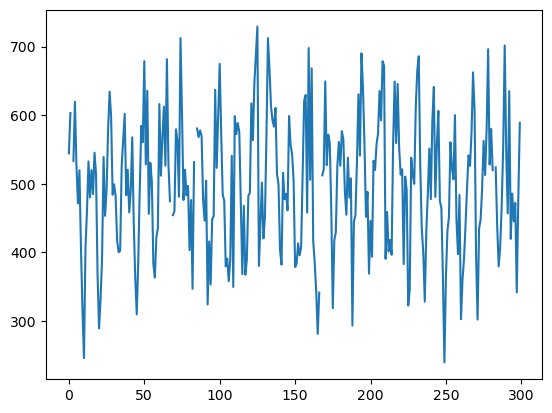

In [105]:
# EDA
display(df.shape)
display(df.info())
display(df.describe())
display(df.isna().sum()[df.isna().sum()>0])
plt.plot(df)
plt.show()

#### [답안] (6분)
- 300개의 시계열 데이터로 결측이 5건 존재한다. 평균은 498.67이고 표준편차는 97.6이다. 라인그래프로 시각화한 결과 추세(trend)는 보이지 않으며 시간에 흐름에 따른 분산도 일정한 편이다. 정상 시계열 데이터로 본다.

## 2.2 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라

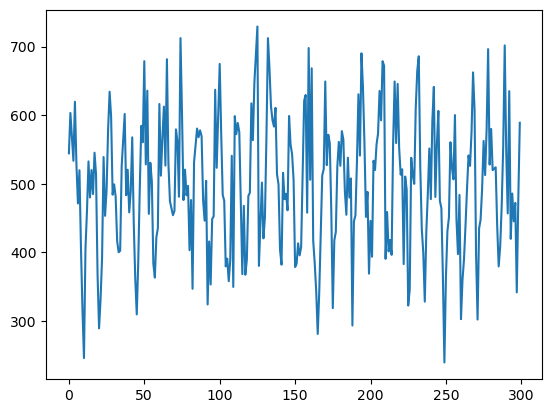

In [111]:
df2 = df.interpolate(method = 'linear')
plt.plot(df2)
plt.show()

#### [답안] (8분)
- 시계열 데이터에 있어서 결측치 처리는 중요하다. 시간의 흐름이 중요하기 때문에 단순 평균이나 중앙값으로 대체하는 것은 맞지 않고 인접한 데이터를 사용하여 누락한 데이터를 추정하는 방법인 보간법을 사용한다.

## 2.3 계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

In [133]:
# 데이터 준비
train = df2[:290]
test = df2[290:]

# 자동 차수 선택
display(auto_arima(train, start_p=1, start_q=1, max_p=5, max_q=5, start_P=0, start_Q=0, max_Q=5, m=12, seasonal=True,
          trace=False, error_action = 'warn', suppress_warnings = True))

# 모델 만들기
model = ARIMA(train, order = (1,0,0), seasonal_order = (2, 0, 1, 12))
fitted = model.fit()
resid = fitted.resid
display(fitted.summary())

# 성능평가
pred = fitted.forecast(10)
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

MAPE = MAPE(pred, test.counts)
print('MAPE : ', MAPE)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             counts   No. Observations:                  290
Model:             ARIMA(1, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -1637.914
Date:                            Mon, 09 Oct 2023   AIC                           3287.827
Time:                                    22:41:57   BIC                           3309.847
Sample:                                         0   HQIC                          3296.649
                                            - 290                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        499.0941     25.081     19.899      0.000     449.936     548.253
ar.L1          0.2085      0.055      3.767      0.000       0.100       0.317
ar.S.L12       0.8500      0.073     11.606      0.000       0.706       0.994
ar.S.L24       0.1447      0.071      2.041      0.041       0.006       0.284
ma.S.L12      -0.8976      0.062    -14.377      0.000      -1.020      -0.775
sigma2      4366.3036    404.120     10.804      0.000    3574.242    5158.365
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.70   Prob(JB):                         0.87
Heteroskedasticity (H):               1.08   Skew:                            -0.03
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MAPE :  13.74779245511419


#### [답안] (34분)
- 300개의 데이터를 앞의 290개를 학습하고 뒤의 10개를 테스트용으로 분리하여 진행했다. 차수 선택을 위해 auto arima를 사용하였고 그 결과 ar차수 1, ma차수 0 그리고 계절성 부분에서는 P = 2, Q  = 1, 계절성 단위는 12로 나왔다. 이렇게 나온 차수를 적용하여 sarimax모델을 만들었고 10개를 예측하여 앞서 테스트용으로 분리한 데이터와 비교하였다. 그 결과 성능평가 지표는 MAPE를 적용하였고 13.75의 결과가 나왔다. 
- 모델 결과 요약에서 잔차에 대한 부분을 보면 먼저 잔차의 자기상관을 검정하는 Ljung-Box에서는 p-value값은 0.7로 잔차의 자기상관이 없다는 귀무가설을 채택한다. 그리고 잔차의 정규성을 검정하는 Jarque-Bera에서는 pvalue의 값이 0.87로 정규성을 갖는다는 귀무가설을 채택한다. 그리고 등분산성을 나타내는 Heteroskedasticity를 보면 1.08이 1에 가까우므로 등분산성을 만족한다고 판단한다. 따라서 모델이 데이터를 적절하게 설명하고 있다고 할 수 있다.

## 2.4 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안

- 해당 모델 결과를 살펴보았을때 데이터를 적절하게 설명하고 있는 결과로 보여진다. 현업에서 시계열 모델로 사용하려면 좀더 예측 정확도를 높일 수 있는 방안을 마련해야 할 것이다. 그리고 만약 이 모델을 적용한다고 한다면 모델을 주기적으로 업데이트하는 부분을 고려해야할 것이다.

## 3-1
서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?


In [4]:
x = 100
2*x / (x/100+x/80)

88.88888888888889

#### [답안]
- 속도는 거리 / 시간인데 서울에서 영동까지의 거리가 100km 라면 평균속도는 88.88km이다.

## 3-2
3년동안 연매출이 3000, 4000, 5000이었다면 연평균성장률을 구하시오


In [10]:
# 연평균 성장률(年平均成長率, compound annual growth rate, CAGR)
# 연평균 성장률 = ((최종연매출/최초연매출)**(1/년수))-1
((5000/3000)**(1/3))-1


0.1856311014966876

#### [답안] 
- 연평균 성장률은 0.1856이다.

## 3-3
어느 마라톤 대회에 참가한 50명의 동호회 회원 중 마라톤에서 완주한 회원 수와 기권한 회원 수가 다음과 같다
|구분|남성|여성|
|:---|:---:|:---:|
|완주한 회원 수|27|9|
|기권한 회원 수|8|6|

참가한 회원 중에서 임의로 선택한 한명의 회원이 여성이었을 때, 이 회원이 마라톤에서 완주하였을 확률은?

In [15]:
# 뽑힌 사람이 여자일 확률
a = (9+6)/(27+8+9+6)
print(a)
# 뽑힌 사람이 완주할 확률
b = (27+9)/(27+8+9+6)
print(b)
# 뽑힌 사람이 여성이면서 완주할 확률
a_b = 9 / (27+8+9+6)
print(a_b)
print(a_b/a)

0.3
0.72
0.18
0.6


#### [답안]
- 뽑힌 사람이 여자일 확률은 0.3이며 뽑힌 사람이 여성이면서 완주할 확률은 0.18이다. 따라서 참가한 회원 중에서 임의로 선택한 한명의 회원이 여성이었을 때, 이 회원이 마라톤에서 완주하였을 확률은 0.6이다.

## 3-4
표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정


In [17]:
# 모평균을 모르는 경우 카이제곱 분포
n = 10
v = 90
df = n-1
conf_a = 0.05

from scipy.stats import chi2
conf_c1 = chi2.ppf(1-conf_a/2, df)
conf_c2 = chi2.ppf(conf_a/2, df)

CR1 = df * v/ conf_c1
CR2= df * v/ conf_c2
print('점추정량 : ', v)
print('구간추정량 : ', CR1, ' ~ ', CR2)

점추정량 :  90
구간추정량 :  42.58055444790953  ~  299.95672846672363


#### [답안]
- 표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간은 42.85~299.956으로 추정할 수 있다.

## 4
정규모집단으로부터 크기가 9인 표본을 추출하여 평균과 표준편차를 계산하였더니 각각 $\bar x$=8.3과 s=1.2였다고한다. 모평균 $\mu$에 대한 95% 신뢰구간을 구하고, 유의수준 5%로 가설 $H0$: $\mu$=8.5 대 $H1$ : $\mu$ $\ne$ 8.5를검정하라.


In [21]:
# 모표준편차를 모르는 경우 모평균의 추정
n = 9 # 표본 크기
x = 8.3 # 표본평균
s = 1.2 # 표본표준편차


mu0 = 8.5
test_a = 0.05 # 유의수준
SE = s / np.sqrt(n) # standard error
tstat = (x - mu0)/SE # 검정통계량
conf_t = t.ppf(1-conf_a/2, df) # 신뢰구간을 구하기 위한 Z값
ME = conf_t * SE #오차의 한계
# 양측검정
sp = (1-t.cdf(np.abs(tstat), df))*2
cv = t.ppf(1-test_a/2, df)
cv = '+/-{:.3f}'.format(cv)
print('검정')
print('임계값: {}, 검정통계량: {:.3f}'.format(cv, tstat))
print('유의수준: {:.3f}, 유의확률: {:.3f}'.format(test_a, sp))
print('신뢰구간: {:.3f}~{:.3f}, 검정하고자 하는 값 {}'.format(x-ME, x+ME, mu0))
        

검정
임계값: +/-2.262, 검정통계량: -0.500
유의수준: 0.050, 유의확률: 0.629
신뢰구간: 7.395~9.205, 검정하고자 하는 값 8.5


#### [답안]
- 유의확률(p-value)은 0.629로 유의수준 0.05보다 크므로 귀무가설을 기각하지 못한다. 따라서 유의수준 5%하에 평균이 8.5라고 할 수 있다.

## 5
공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다  
- 5.1 귀무가설과 연구가설을 제시하시오
- 5.2 검정 후 귀무가설 기각 여부 제시


In [23]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


In [33]:
from scipy import stats

print('데이터의 건수 : ', df.shape[0])
x = df.loc[df['공장명'] == 'X', '출하 소요시간']
y = df.loc[df['공장명'] == 'Y', '출하 소요시간']
z = df.loc[df['공장명'] == 'Z', '출하 소요시간']
print(stats.kruskal(x, y, z))

데이터의 건수 :  44
KruskalResult(statistic=0.7217886080379153, pvalue=0.6970526702392181)


#### [답안] (통계분석 1시간 4분)
- 5-1. 가설 제시
H0 : 각 공장의 중위수의 차이가 존재하지 않는다.
H1 : 각 공장의 중위수의 차이가 존재한다.
- 5-2. 검정
공장별로 출하 소요시간의 중위수의 차이를 확인하기 위해 크루스컬 월리스 검정을 수행한 결과
유의확률(p-value)이 0.697로 유의수준 0.05보다 크므로 귀무가설을 기각하지 못한다.
즉, 각 공장의 중위수의 차이가 존재하지 않는다.

## 6
아래는 A사의 투자안별 투자금과 순현재가치 (NPV) 이다. 투자금을 1개차 50억원, 2개차 60억원, 3개차 70억원으로 결정했다면, 최대의 NPV는 얼마이고 최적의 투자안은 어떤 것인지 선정하시오.


|투자안|1년차 투자금 (억원)|2년차 투자금 (억원)|3년차 투자금 (억원)|NPV(억원)|
|:---|:---:|:---:|:---:|:---:|
|1안|23|23|15|30|
|2안|15|15|12|20|
|3안|17|25|12|31|
|4안|16|12|13|42|
|5안|24|23|17|44|



# 끝. 8페이지